In [65]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import learning_curve
# KNN Model
from sklearn.neighbors import KNeighborsClassifier

In [66]:
import pickle 

with open('preprocessing/cardio/X_most_frequent.pkl', 'rb') as f:
    X = pickle.load(f)
    X = np.array(X)
with open('preprocessing/cardio/y.pkl', 'rb') as f:
    y = pickle.load(f)
    y = np.array(y)

print('So luong du lieu: ', len(X))
print('So luong nhan: ', len(y))
len(X)

So luong du lieu:  70000
So luong nhan:  70000


70000

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
def cross_validation(estimator):
    _, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=10, n_jobs=-1, train_sizes=[1.0, ], scoring="accuracy")
    test_scores = test_scores[0]
    mean, std = test_scores.mean(), test_scores.std()
    return mean, std

def plot(title, xlabel, X, Y, error, ylabel = "Accuracy"):
    plt.xlabel(xlabel)
    plt.title(title)
    plt.grid()
    plt.ylabel(ylabel)
    plt.errorbar(X, Y, error, linestyle='None', marker='o')

In [46]:
class KNN:
    def __init__(self, top_k=5) -> None:
        self.top_k = top_k
        self.X_train = None
        self.y_train = None
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    @staticmethod
    def distance(x1, x2):
        return np.linalg.norm(x1 - x2)
    def predict_batch(self, X):
        y_pred = [self.predict(x) for x in X]
        return y_pred
    def predict(self, x):
        # Compute distance to all points in train set 
        distance = [self.distance(x, x_train) for x_train in self.X_train]
        # Sort the distance with index
        top_idx = np.argsort(distance)
        # Get top K label
        # use disctionary to store the k nearest
        votes = {}
        for i in range(self.top_k):
            label = self.y_train[top_idx[i]]
            votes.setdefault(label, 0)
            votes[label] += 1
        
        return max(votes)

100%|██████████| 6/6 [09:11<00:00, 91.95s/it]


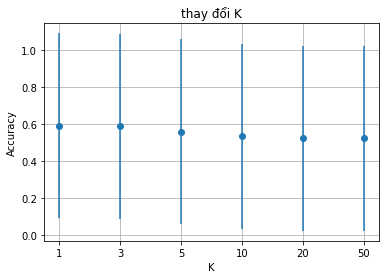

In [49]:
title = "thay đổi K"
xlabel = "K"
X = []
Y = []
error = []

for k in tqdm([1, 3, 5, 10, 20, 50]):
    # Load model
    model = KNN(top_k = k)
    model.fit(X_train, y_train)

    # Sample predict model
    y_pred = model.predict_batch(X_test)

    # Caculate accuracy score
    acc = accuracy_score(y_pred, y_test)

    X.append(str(k))
    Y.append(acc)
    error.append(0.5)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
# plt.savefig('images/KNN_change_K.png', bbox_inches='tight')
plt.show()

In [34]:
acc

0.5914285714285714

100%|██████████| 6/6 [18:38<00:00, 186.38s/it]


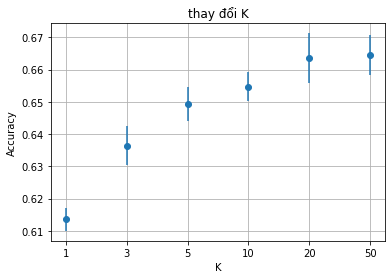

In [63]:
title = "thay đổi K"
xlabel = "K"
X = []
Y = []
error = []

for k in tqdm([1, 3, 5, 10, 20, 50]):
    # Với từng giá trị k nhận được,
    # thực hiện xây dựng mô hình, huấn luyện và đánh giá theo cross-validation
    text_clf = KNeighborsClassifier(n_neighbors=k)
    mean, std = cross_validation(text_clf)
    X.append(str(k))
    Y.append(mean)
    error.append(std)

# lưu kết quả ra file ảnh
plot(title, xlabel, X, Y, error)
# plt.savefig('images/KNN_change_K.png', bbox_inches='tight')
plt.show()

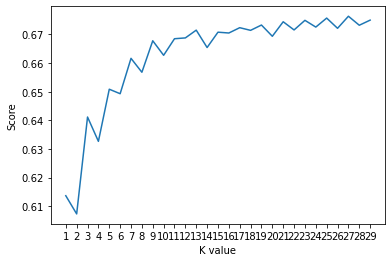

Maximum KNN Score is 67.64%


In [73]:
# try ro find best k value
scoreList = []
for i in range(1,30):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,30), scoreList)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
print("Maximum KNN Score is {:.2f}%".format(acc))

KNN: 0.6763571428571429


C:\Users\dovan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


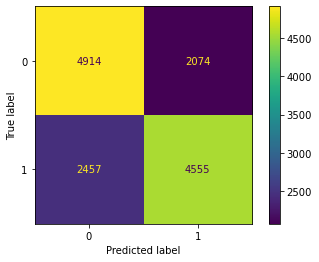

In [74]:
# Test với bộ tham số tốt nhất
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(X_train, y_train)

print(f'KNN: {accuracy_score(y_test, knn.predict(X_test))}')
# Hiển thị confusion matrix
plot_confusion_matrix(knn, X_test, y_test)

In [80]:
from sklearn.metrics import precision_score, recall_score
recall_s = recall_score(y_test, knn.predict(X_test), average=None)
print('Tỉ lệ dự đoán đúng người bị bệnh là ', recall_s[1])
print('Tỉ lệ dự đoán đúng người không bị bệnh là', recall_s[0])

Tỉ lệ dự đoán đúng người bị bệnh là  0.6496006845407872
Tỉ lệ dự đoán đúng người không bị bệnh là 0.7032054951345164
